# K-means

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [5]:
dataset, membership, centers = datasets.make_blobs(n_samples=500, n_features=2,
                                                   centers=5, return_centers=True,
                                                   cluster_std=1.0)

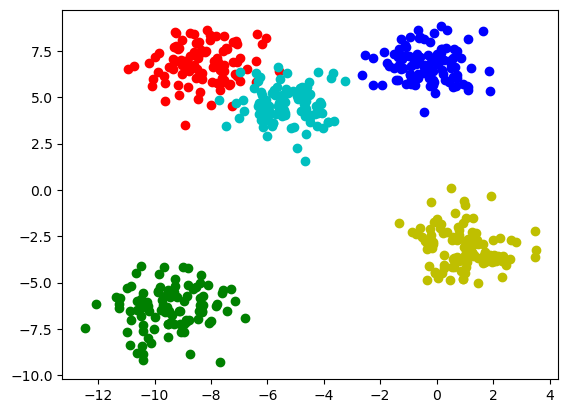

In [8]:
plt.scatter(dataset[(membership==0),0], dataset[(membership==0),1], color='r')
plt.scatter(dataset[(membership==1),0], dataset[(membership==1),1], color='g')
plt.scatter(dataset[(membership==2),0], dataset[(membership==2),1], color='b')
plt.scatter(dataset[(membership==3),0], dataset[(membership==3),1], color='y')
plt.scatter(dataset[(membership==4),0], dataset[(membership==4),1], color='c')
plt.show()

In [86]:
k=5

n_data = dataset.shape[0]

In [87]:
coors_k = np.random.uniform(low=-10.0, high=10.0, size=[k,2])

In [88]:
our_membership = np.zeros([n_data], dtype=int)

In [89]:
bigest_movement = np.inf

In [90]:
while (bigest_movement>0.0001):
    
    # Adjudico puntos al centroide más cercano
    for ii in range(n_data):
        aux_dist = np.inf
        for jj in range(k):
            dist = np.sqrt( (dataset[ii,0]-coors_k[jj,0])**2 +  (dataset[ii,1]-coors_k[jj,1])**2 )
            if dist<aux_dist:
                aux_dist = dist
                our_membership[ii]=jj
    
    # Recalculo centroides
    new_coors_k = np.zeros([k,2], dtype=float)
    for ii in range(k):
        mask = (our_membership == ii)
        new_coors_k[ii,0] = np.mean(dataset[mask, 0])
        new_coors_k[ii,1] = np.mean(dataset[mask, 1])

    # Miro el desplazamiento mayor de los centroides
    
    bigest_movement = 0.0
    
    for ii in range(k):
        
        movement = np.sqrt( (coors_k[ii,0]-new_coors_k[ii, 0])**2 +  (coors_k[ii,1]-new_coors_k[ii,1])**2 )

        if movement>bigest_movement:
            bigest_movement = movement
    
    print(bigest_movement)
    
    coors_k = new_coors_k

4.572580268456406
4.475230020967251
0.32452979708667423
0.11511645755568828
0.0


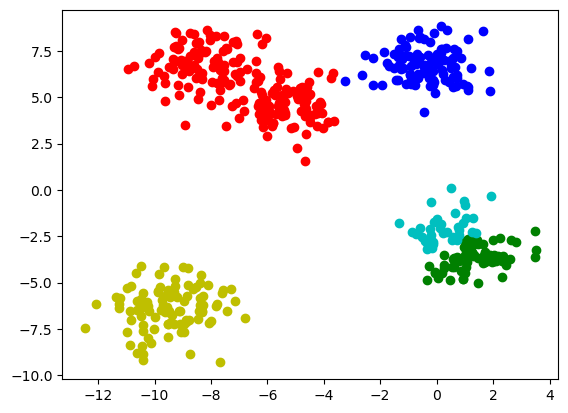

In [91]:
plt.scatter(dataset[(our_membership==0),0], dataset[(our_membership==0),1], color='r')
plt.scatter(dataset[(our_membership==1),0], dataset[(our_membership==1),1], color='g')
plt.scatter(dataset[(our_membership==2),0], dataset[(our_membership==2),1], color='b')
plt.scatter(dataset[(our_membership==3),0], dataset[(our_membership==3),1], color='y')
plt.scatter(dataset[(our_membership==4),0], dataset[(our_membership==4),1], color='c')
plt.show()